# Association Rule Assignment | Groceries Dataset

## Import Libraries

In [76]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

## Load the Dataset

In [77]:
df = pd.read_csv(r"C:\Ozy\Data Science\DS datasets\Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


## Basic Information of Dataset

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


## Checking Missing values in DataFrame

In [79]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

## Remove duplicates in DataFrame

In [80]:
df.drop_duplicates(inplace=True)

## Check for anomalies in 'Member_number' and 'itemDescription'

In [81]:
print(df['Member_number'].nunique())
print(df['itemDescription'].nunique())

3898
167


## Convert 'Date' column to datetime

In [82]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

## Transform data to basket format

In [83]:
basket = df.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().unstack().reset_index().fillna(0).set_index('Member_number')
basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Convert to 0/1

In [84]:
basket = basket.applymap(lambda x: 1 if x >= 1 else 0)
basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Convert the DataFrame to boolean type:

In [85]:
basket = basket.astype(bool)

## Generate frequent itemsets

In [86]:
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.015393,(Instant food products)
1,0.078502,(UHT-milk)
2,0.031042,(baking powder)
3,0.119548,(beef)
4,0.079785,(berries)
...,...,...
3011,0.011031,"(whole milk, soda, whipped/sour cream, yogurt)"
3012,0.010518,"(bottled water, rolls/buns, other vegetables, ..."
3013,0.013597,"(rolls/buns, other vegetables, sausage, whole ..."
3014,0.010005,"(rolls/buns, other vegetables, shopping bags, ..."


## Generate association rules

In [87]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(beef),0.078502,0.119548,0.010518,0.133987,1.120775,0.001133,1.016672,0.116940
1,(beef),(UHT-milk),0.119548,0.078502,0.010518,0.087983,1.120775,0.001133,1.010396,0.122392
2,(bottled beer),(UHT-milk),0.158799,0.078502,0.014879,0.093700,1.193597,0.002413,1.016769,0.192815
3,(UHT-milk),(bottled beer),0.078502,0.158799,0.014879,0.189542,1.193597,0.002413,1.037933,0.176014
4,(bottled water),(UHT-milk),0.213699,0.078502,0.021293,0.099640,1.269268,0.004517,1.023477,0.269801
...,...,...,...,...,...,...,...,...,...,...
15255,(rolls/buns),"(whole milk, soda, yogurt, other vegetables)",0.349666,0.027963,0.013597,0.038885,1.390578,0.003819,1.011364,0.431893
15256,(other vegetables),"(whole milk, soda, yogurt, rolls/buns)",0.376603,0.024628,0.013597,0.036104,1.465954,0.004322,1.011905,0.509869
15257,(whole milk),"(soda, yogurt, rolls/buns, other vegetables)",0.458184,0.020010,0.013597,0.029675,1.483002,0.004428,1.009961,0.601111
15258,(soda),"(whole milk, yogurt, rolls/buns, other vegetab...",0.313494,0.034377,0.013597,0.043372,1.261658,0.002820,1.009403,0.302098


## Histogram for support vs confidence

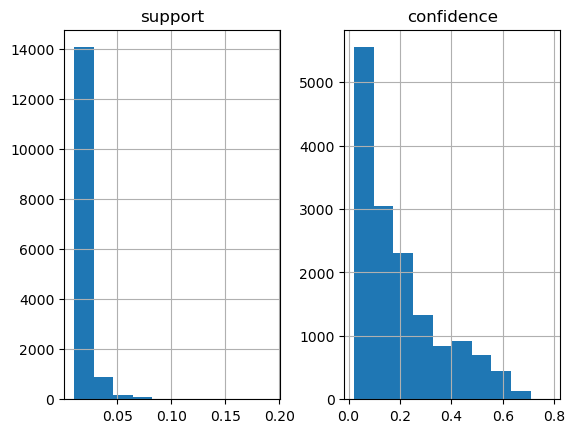

In [88]:
rules[['support', 'confidence']].hist()
plt.show()

## Scatter plot for support vs confidence

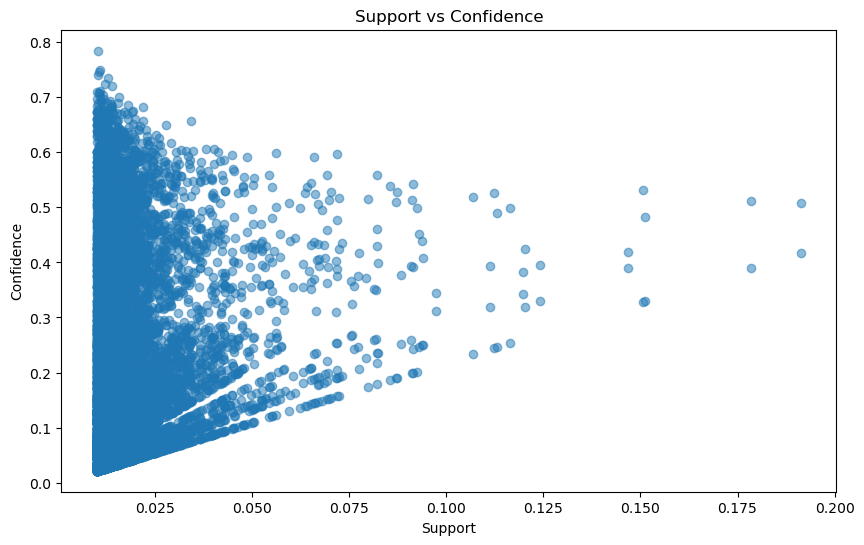

In [89]:
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

## Metrics and Visualizations

Histogram:
- Support Histogram: Shows the frequency distribution of the support values for the association rules which is around 14000
- Confidence Histogram: Shows the frequency distribution of the confidence values for the association rules which is above 5000

Support vs Confidence Scatter Plot:
- The scatter plot shows the relationship between support and confidence, highlighting rules with strong and reliable patterns.

## Key Findings:

- Itemsets with high support values were identified, indicating popular items bought together.
- High Lift Rules: Rules with high lift values suggest strong associations. For example, customers buying 'whole milk' often bought 'yogurt'.
- Support and Confidence: Rules with high support and confidence values indicate reliable and frequent patterns.

## Effectiveness

- The analysis was effective in uncovering meaningful patterns in the dataset. The use of the Apriori algorithm and visualizations provided clear insights into customer purchasing behavior, which can be valuable for optimizing product placement, cross-promotions, and inventory management.